In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
with open("../loging.log", "r") as f:
    file = [s.strip().split("#") for s in f.readlines()]

In [119]:
df = pd.DataFrame(file)
header = df.iloc[0]

df = df[1:]
df.columns = header
type_map = {"method": "str"}
for h in header[2:]:
    type_map[h] = "int32"

In [120]:
df.head()

,datastructure,method,strategy,k,n_neighbors,n_batch,n_line_train0,n_line_train1,n_line_train2,n_line_train3,...,combine_time1,combine_time2,combine_time3,combine_time4,combine_time5,combine_time6,combine_time7,combine_time8,combine_time9,total
1,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,50,60,55,61,50,56,63,58,56,20866
2,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,54,63,65,65,55,47,57,67,56,20175
3,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,65,73,86,78,68,49,78,56,56,20244
4,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,52,58,60,53,55,59,61,68,61,20976
5,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,50,76,63,59,63,58,55,55,55,20150


In [121]:
df = df.astype(type_map)

In [122]:
df.head()

,datastructure,method,strategy,k,n_neighbors,n_batch,n_line_train0,n_line_train1,n_line_train2,n_line_train3,...,combine_time1,combine_time2,combine_time3,combine_time4,combine_time5,combine_time6,combine_time7,combine_time8,combine_time9,total
1,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,50,60,55,61,50,56,63,58,56,20866
2,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,54,63,65,65,55,47,57,67,56,20175
3,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,65,73,86,78,68,49,78,56,56,20244
4,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,52,58,60,53,55,59,61,68,61,20976
5,[RustVector],"""deepcopy""",1,15000,30,2,345,345,345,345,...,50,76,63,59,63,58,55,55,55,20150


In [123]:
df.columns

Index(['datastructure', 'method', 'strategy', 'k', 'n_neighbors', 'n_batch',
       'n_line_train0', 'n_line_train1', 'n_line_train2', 'n_line_train3',
       'n_line_train4', 'n_line_train5', 'n_line_train6', 'n_line_train7',
       'n_line_train8', 'n_line_train9', 'n_line_test0', 'n_line_test1',
       'n_line_test2', 'n_line_test3', 'n_line_test4', 'n_line_test5',
       'n_line_test6', 'n_line_test7', 'n_line_test8', 'n_line_test9',
       'load_time0', 'load_time1', 'load_time2', 'load_time3', 'load_time4',
       'load_time5', 'load_time6', 'load_time7', 'load_time8', 'load_time9',
       'preprocess_time0', 'preprocess_time1', 'preprocess_time2',
       'preprocess_time3', 'preprocess_time4', 'preprocess_time5',
       'preprocess_time6', 'preprocess_time7', 'preprocess_time8',
       'preprocess_time9', 'query_time0', 'query_time1', 'query_time2',
       'query_time3', 'query_time4', 'query_time5', 'query_time6',
       'query_time7', 'query_time8', 'query_time9', 'combine_tim

In [124]:
df["method"].unique()

array(['"deepcopy"', '"arc"'], dtype=object)

In [125]:
df["strategy"].unique()

array([1, 2])

In [126]:
df["n_batch"].unique()

array([2, 3])

In [127]:
df["n_neighbors"].unique()

array([30])

In [128]:
# method & n_batch & k -> total, preprocess_time, query_time, mean(total), mean(preprocess), mean(queer)

In [129]:
preprocess_cols = ["preprocess_time" + str(i) for i in range(8)]
query_cols = ["query_time" + str(i) for i in range(8)]
total_col = ["total"]

agg_v = df.groupby(["method", "strategy","n_batch", "k", "n_neighbors"])[preprocess_cols + query_cols + total_col]

In [130]:
agg_mean = agg_v.mean()

In [131]:
agg_mean

0                                              preprocess_time0  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                     9752.6   
                            20000 30                    10462.6   
                            25000 30                    10656.2   
                    3       15000 30                    11334.2   
                            20000 30                    11829.8   
                            25000 30                    11528.4   
           2        2       15000 30                    10165.0   
                            20000 30                    10834.2   
                            25000 30                    13693.2   
                    3       15000 30                    12461.6   
                            20000 30                    13620.4   
                            25000 30                    13750.6   
"deepcopy" 1        2       15000 30                     7819.8   
                            20000 30                     8386.6   
                            25000 30                     8862.2   
                    3       15000 30                     9337.4   
                            20000 30                     9641.8   
                            25000 30                     9584.8   
           2        2       15000 30                     7971.0   
                            20000 30                     8111.8   
                            25000 30                    10890.6   
                    3       15000 30                     9830.6   
                            20000 30                    10922.2   
                            25000 30                    11077.2   

0                                              preprocess_time1  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                     8154.2   
                            20000 30                     8769.0   
                            25000 30                     9748.8   
                    3       15000 30                     8952.6   
                            20000 30                    10129.6   
                            25000 30                     9873.2   
           2        2       15000 30                     9497.2   
                            20000 30                     8786.4   
                            25000 30                    13346.8   
                    3       15000 30                    12186.8   
                            20000 30                    10483.4   
                            25000 30                    10752.6   
"deepcopy" 1        2       15000 30                     6616.0   
                            20000 30                     7207.4   
                            25000 30                     8223.6   
                    3       15000 30                     7594.4   
                            20000 30                     8483.6   
                            25000 30                     8274.6   
           2        2       15000 30                     7365.8   
                            20000 30                     6842.6   
                            25000 30                    12728.2   
                    3       15000 30                     9267.2   
                            20000 30                     8690.8   
                            25000 30                     8781.6   

0                                              preprocess_time2  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                     7998.8   
                            20000 30                     8562.2   
                            25000 30                     9496.0   
                    3       15000 30                     8510.6   
                            20000 30                     9549.0   
                            25000 30         

In [132]:
agg_reidx = agg_mean.reset_index(level=['method', "strategy", 'n_batch', 'k'])

In [133]:
neighbor_impact = agg_reidx[(agg_reidx["method"] == '"deepcopy"') & (agg_reidx["strategy"] == 1) & (agg_reidx['n_batch'] == 2) & (agg_reidx['k'] == 15000)]

In [134]:
neighbor_impact

,method,strategy,n_batch,k,preprocess_time0,preprocess_time1,preprocess_time2,preprocess_time3,preprocess_time4,preprocess_time5,...,preprocess_time7,query_time0,query_time1,query_time2,query_time3,query_time4,query_time5,query_time6,query_time7,total
n_neighbors,,,,,,,,,,,,,,,,,,,,,
30,"""deepcopy""",1,2,15000,7819.8,6616.0,6530.4,6518.0,6698.8,6524.0,...,6587.6,12024.2,13059.0,13139.8,13126.8,13062.6,13127.0,13060.0,13129.8,20482.2


In [135]:
# m_preprocess = list()
# m_query = list()
# for i in [10 , 20 , 30]:
#     m_preprocess.append(neighbor_impact[neighbor_impact["n_neighbors"] == i][preprocess_cols].values.mean())
#     m_query.append(neighbor_impact[neighbor_impact["n_neighbors"] == i][query_cols].values.mean())

In [136]:
m_preprocess

[]

In [137]:
m_query

[]

In [138]:
# n_neighbors does not have impact to runtime performance

In [139]:
agg_v = df.groupby(["method", "strategy", "n_batch", "k"])[preprocess_cols + query_cols + total_col]

In [140]:
agg_mean = agg_v.mean()

In [141]:
agg_mean

0                                  preprocess_time0  preprocess_time1  \
method     strategy n_batch k                                           
"arc"      1        2       15000            9752.6            8154.2   
                            20000           10462.6            8769.0   
                            25000           10656.2            9748.8   
                    3       15000           11334.2            8952.6   
                            20000           11829.8           10129.6   
                            25000           11528.4            9873.2   
           2        2       15000           10165.0            9497.2   
                            20000           10834.2            8786.4   
                            25000           13693.2           13346.8   
                    3       15000           12461.6           12186.8   
                            20000           13620.4           10483.4   
                            25000           13750.6           10752.6   
"deepcopy" 1        2       15000            7819.8            6616.0   
                            20000            8386.6            7207.4   
                            25000            8862.2            8223.6   
                    3       15000            9337.4            7594.4   
                            20000            9641.8            8483.6   
                            25000            9584.8            8274.6   
           2        2       15000            7971.0            7365.8   
                            20000            8111.8            6842.6   
                            25000           10890.6           12728.2   
                    3       15000            9830.6            9267.2   
                            20000           10922.2            8690.8   
                            25000           11077.2            8781.6   

0                                  preprocess_time2  preprocess_time3  \
method     strategy n_batch k                                           
"arc"      1        2       15000            7998.8            7960.6   
                            20000            8562.2            8587.2   
                            25000            9496.0            9156.8   
                    3       15000            8510.6            8548.4   
                            20000            9549.0            9429.6   
                            25000            9442.4            9340.4   
           2        2       15000           10118.2            7976.2   
                            20000            8583.4            8597.2   
                            25000           13811.2            9439.8   
                    3       15000           11066.0           10670.0   
                            20000           10844.6           10250.6   
                            25000           10847.6           11215.4   
"deepcopy" 1        2       15000            6530.4            6518.0   
                            20000            7136.2            7112.0   
                            25000            8037.0            7952.4   
                    3       15000            7453.4            7471.4   
                            20000            8353.4            8102.6   
                            25000            8385.6            8073.0   
           2        2       15000            8471.6            8341.4   
                            20000            6754.6            6738.4   
                            25000           12616.2            9599.8   
                    3       15000            8546.4            8343.6   
                            20000            8960.6            9016.2   
                            25000            9165.8           11301.0   

0                                  preprocess_time4  preprocess_time5  \
method     strategy n_batch k                                           
"arc"      1        2       15000            8225.6     

In [142]:
agg_mean = agg_mean.reset_index(["method", "strategy","n_batch", "k"])

In [143]:
agg_mean

,method,strategy,n_batch,k,preprocess_time0,preprocess_time1,preprocess_time2,preprocess_time3,preprocess_time4,preprocess_time5,...,preprocess_time7,query_time0,query_time1,query_time2,query_time3,query_time4,query_time5,query_time6,query_time7,total
0,"""arc""",1,2,15000,9752.6,8154.2,7998.8,7960.6,8225.6,7937.2,...,8052.6,11626.2,12934.6,13097.4,13076.6,12960.4,13212.6,12946.4,13003.0,22282.4
1,"""arc""",1,2,20000,10462.6,8769.0,8562.2,8587.2,8950.6,8610.2,...,8748.0,16886.8,17955.6,17929.4,17890.2,17893.0,18091.2,17903.2,17820.8,28292.2
2,"""arc""",1,2,25000,10656.2,9748.8,9496.0,9156.8,9465.8,9193.8,...,9445.4,20523.0,22044.2,22203.0,21818.0,22090.6,21779.0,22050.2,21717.0,32554.0
3,"""arc""",1,3,15000,11334.2,8952.6,8510.6,8548.4,8940.8,8577.6,...,8823.0,9749.0,12228.2,12346.2,12092.8,12055.8,11443.8,12271.2,11851.6,22237.8
4,"""arc""",1,3,20000,11829.8,10129.6,9549.0,9429.6,9793.8,9555.4,...,9802.8,14129.2,16361.8,16724.0,16521.8,15890.0,15923.4,16497.8,16533.2,27457.0
5,"""arc""",1,3,25000,11528.4,9873.2,9442.4,9340.4,9712.2,9476.6,...,9591.2,14354.8,16637.6,16670.0,16489.6,16726.2,15921.4,16527.6,16622.8,27501.6
6,"""arc""",2,2,15000,10165.0,9497.2,10118.2,7976.2,10802.8,10478.0,...,8124.0,12536.4,13072.8,12818.2,13403.2,12549.8,12732.8,13017.8,13159.8,23677.4
7,"""arc""",2,2,20000,10834.2,8786.4,8583.4,8597.2,8819.4,8476.6,...,8754.2,16759.6,17918.6,17942.8,17982.6,17933.8,17918.4,17866.4,17865.2,27998.8
8,"""arc""",2,2,25000,13693.2,13346.8,13811.2,9439.8,11886.4,13556.4,...,12847.4,21070.8,22111.6,22065.4,22495.4,22519.0,21831.8,22687.4,21963.6,36151.6
9,"""arc""",2,3,15000,12461.6,12186.8,11066.0,10670.0,10599.4,10106.6,...,10030.2,10562.6,11603.6,12221.0,12319.6,12065.4,11592.8,11851.8,11931.6,24425.2


In [146]:
t_preprocess = np.array([])
t_query = np.array([])
for method in agg_mean['method'].unique():
    for strategy in agg_mean['strategy'].unique():
        for n_batch in agg_mean['n_batch'].unique():
            for k in agg_mean['k'].unique():
#                 if (strategy == 1 and n_batch == 2 and k == 25000):
#                     continue
                row = agg_mean[(agg_mean['method'] == method) & 
                               (agg_mean['strategy'] == strategy) &
                               (agg_mean['n_batch'] == n_batch) &
                               (agg_mean['k'] == k)]
                t_preprocess = np.append(t_preprocess, row[preprocess_cols].values.sum())
                t_query = np.append(t_query, row[query_cols].values.sum())
agg_mean['preprocess_total'] = t_preprocess
agg_mean['query_total'] = t_query

In [147]:
t_preprocess

array([66262.8, 71419.8, 76709.6, 72654.8, 80112.8, 78848.8, 76301.6,
       71678. , 98651.8, 89022.6, 94465. , 98247.6, 53943.4, 58802.8,
       65311.4, 62507.4, 68363.6, 67629.8, 65326.6, 55869.2, 91885.4,
       73818.4, 79268.8, 84573.2])

In [148]:
agg_total = agg_mean[["method", "strategy", "n_batch", "k", 'preprocess_total', 'query_total', 'total']]

In [149]:
agg_total

,method,strategy,n_batch,k,preprocess_total,query_total,total
0,"""arc""",1,2,15000,66262.8,102857.2,22282.4
1,"""arc""",1,2,20000,71419.8,142370.2,28292.2
2,"""arc""",1,2,25000,76709.6,174225.0,32554.0
3,"""arc""",1,3,15000,72654.8,94038.6,22237.8
4,"""arc""",1,3,20000,80112.8,128581.2,27457.0
5,"""arc""",1,3,25000,78848.8,129950.0,27501.6
6,"""arc""",2,2,15000,76301.6,103290.8,23677.4
7,"""arc""",2,2,20000,71678.0,142187.4,27998.8
8,"""arc""",2,2,25000,98651.8,176745.0,36151.6
9,"""arc""",2,3,15000,89022.6,94148.4,24425.2


In [150]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

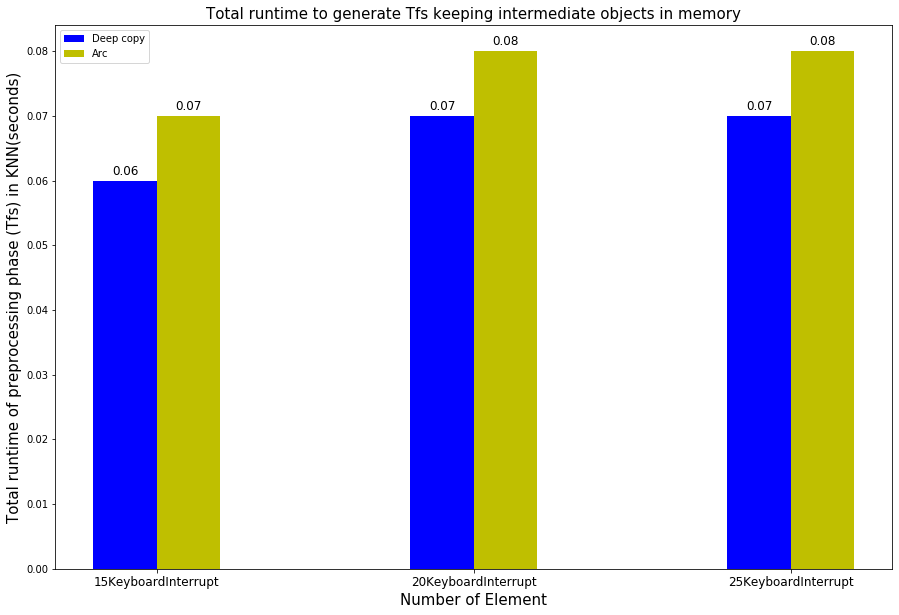

In [151]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "KeyboardInterrupt" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

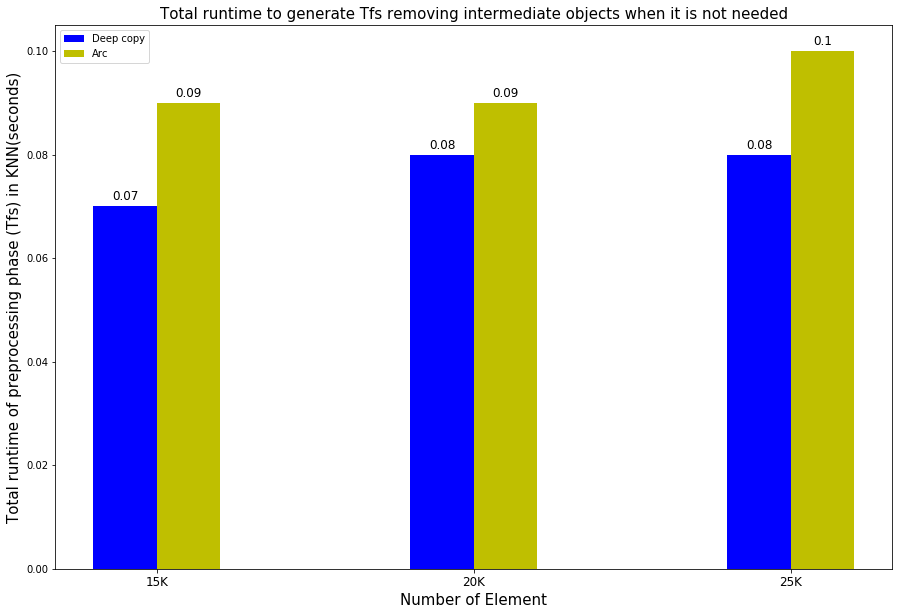

In [152]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

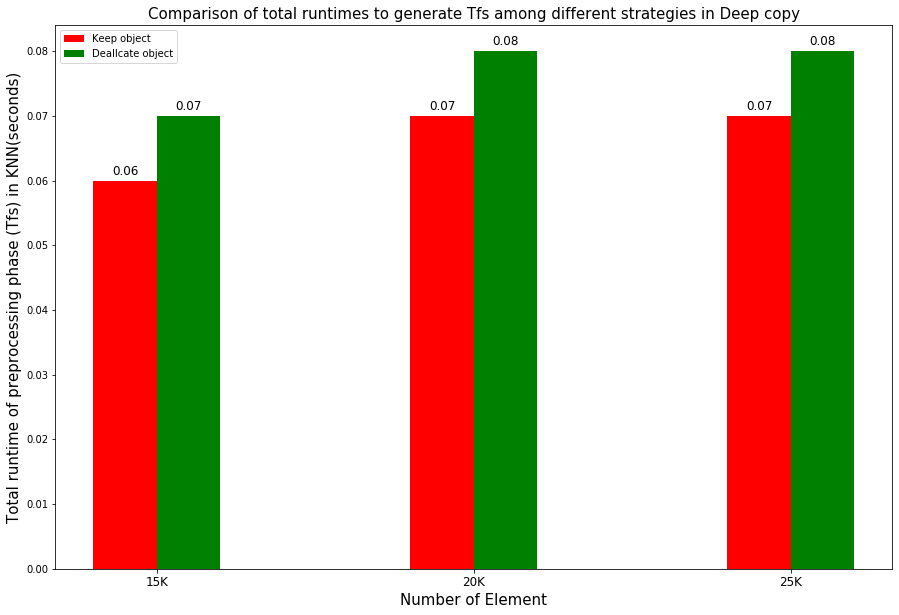

In [153]:
strategy1 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Deep copy", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

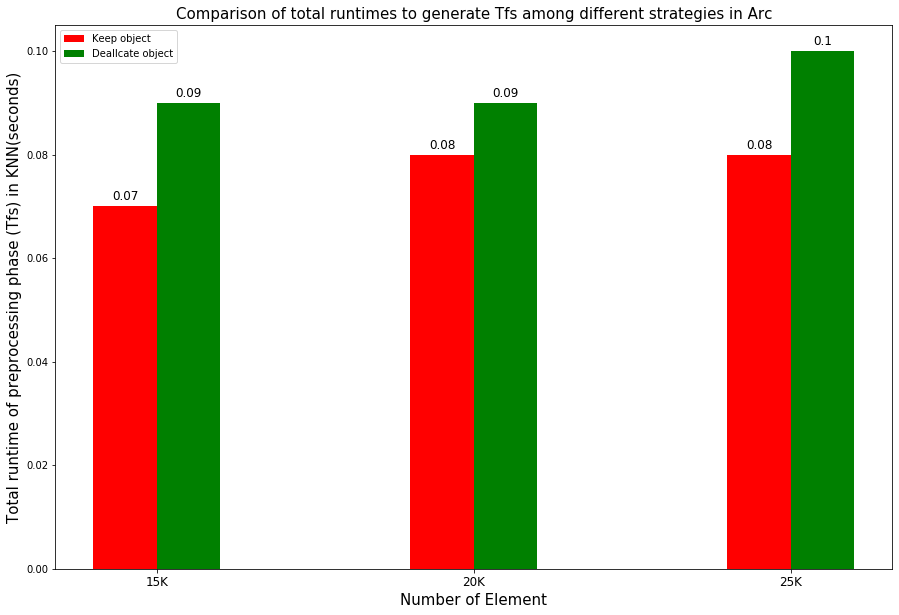

In [154]:
strategy1 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Arc", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

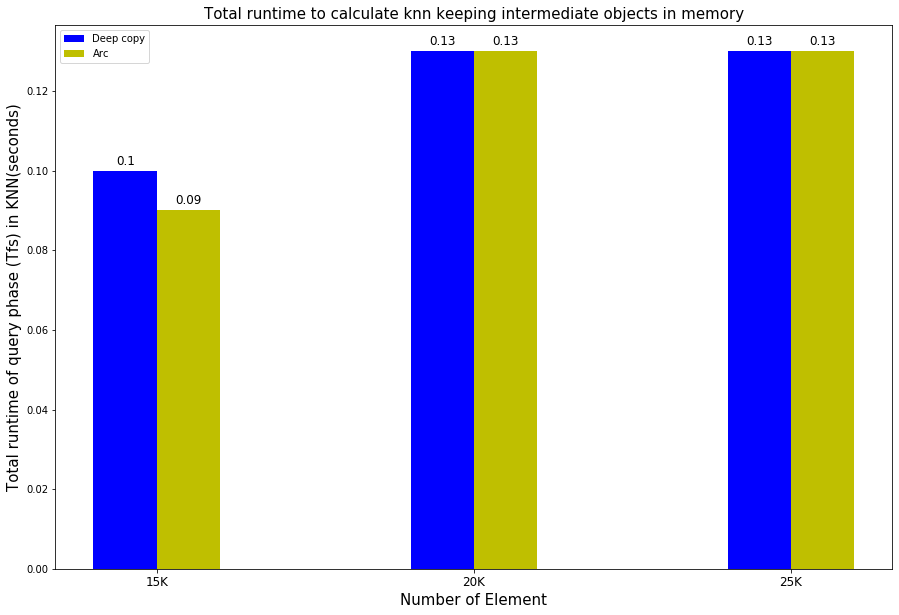

In [155]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

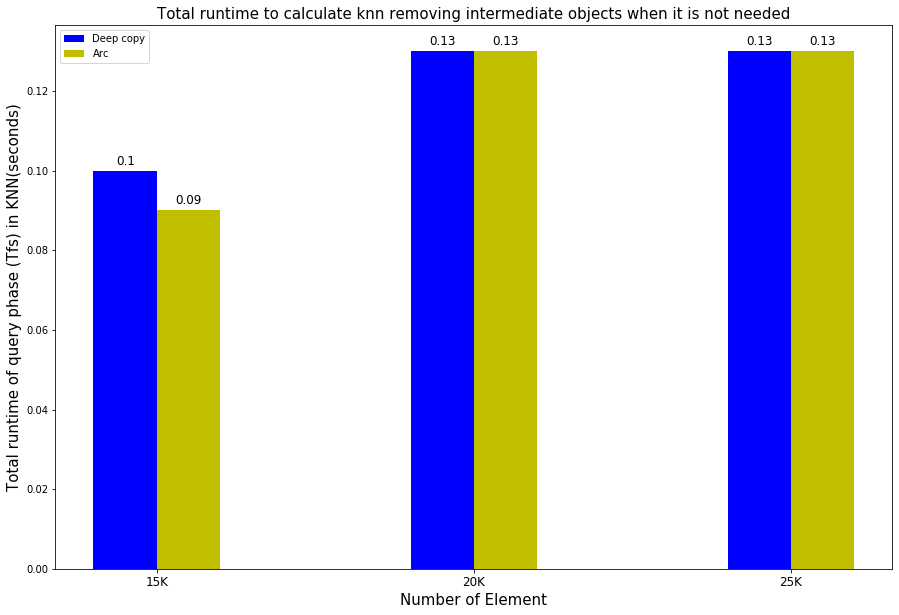

In [156]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

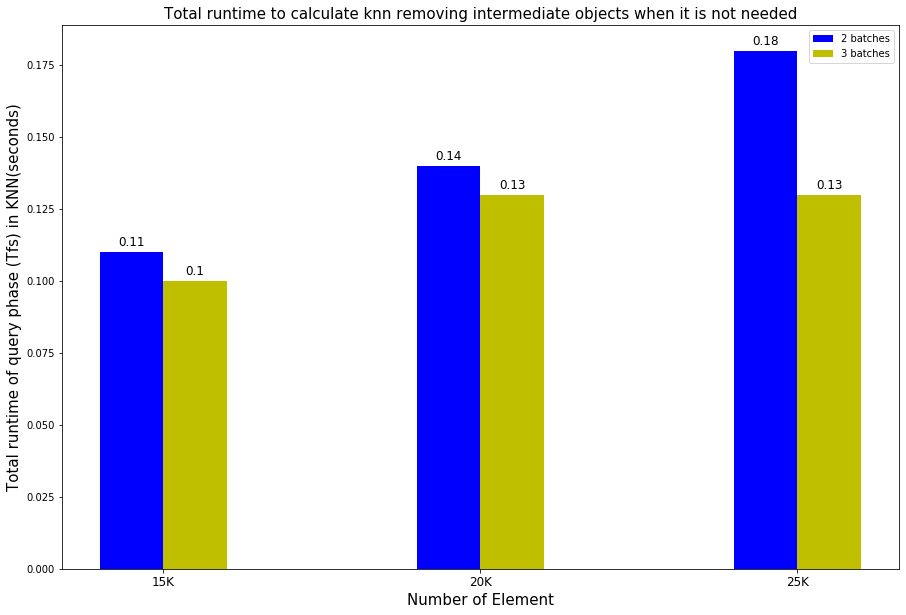

In [157]:
batch2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(batch2["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(batch3["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("2 batches", "3 batches"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()